In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Data from  https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/vitalstatisticspopulationandhealthreferencetables

In [2]:
#Reading CSV's
df_Birth = pd.read_csv('Datasets/Births.csv')
df_Death = pd.read_csv('Datasets/Deaths.csv')
df_Int_Birth = pd.read_csv('Datasets/Births_international.csv')
df_Int_Death = pd.read_csv('Datasets/Death_international.csv')


# These 2 CSV had alternating empty columns , Which is picked as Unnamed in Pandas, hence they were removed
df_Int_Birth = df_Int_Birth.loc[:, ~df_Int_Birth.columns.str.contains('^Unnamed')]
df_Int_Death = df_Int_Death.loc[:, ~df_Int_Death.columns.str.contains('^Unnamed')]



In [3]:
#These Data Had NAN value as ':' , so they were replaced with numply nan for easy manupulation and droping
df_Birth.replace(':',np.NaN,inplace=True)
df_Birth.dropna(axis=0, inplace=True)

df_Death.replace(':',np.NaN,inplace=True)
df_Death.dropna(axis=0, inplace=True)

df_Int_Birth.replace(':',np.NaN,inplace=True)  # Columns were dropped as 1 colum ad many nan value
df_Int_Birth.dropna(axis=1, inplace=True)

df_Int_Death.replace(':',np.NaN,inplace=True)
df_Int_Death.dropna(axis=1, inplace=True)



In [4]:
#Couluns with Country named had uncessary number inthem, hence they were removed and all the value were converted to float as pandas were picked them as object becasue of ':' was used as NAN value
for column in df_Birth.columns:
    df_Birth[column] = df_Birth[column].astype(float)
    df_Birth.rename({column: re.sub('\d', '', column)}, axis=1,inplace=True) #Using Regex /d Expresion ie Any Digit



for column in df_Death.columns:
    df_Death[column] = df_Death[column].astype(float)
    df_Death.rename({column: re.sub('\d', '', column)}, axis=1,inplace=True)


for column in df_Int_Birth.columns:
    df_Int_Birth[column] = df_Int_Birth[column].astype(float)
    df_Int_Birth.rename({column: re.sub('\d', '', column)}, axis=1,inplace=True)


for column in df_Int_Death.columns:
    df_Int_Death[column] = df_Int_Death[column].astype(float)
    df_Int_Death.rename({column: re.sub('\d', '', column)}, axis=1,inplace=True)

    

In [5]:
#Again some year had number assinged to them at end Eg 1940 was 149012, SO only first 4 digit were kept
df_Birth['Year'] = df_Birth['Year'].astype(str).str[:4]
df_Death['Year'] = df_Death['Year'].astype(str).str[:4]

#Then Conveted to Datetime format
df_Birth["Year"] = pd.to_datetime(df_Birth["Year"], format="%Y")
df_Death["Year"] = pd.to_datetime(df_Death["Year"], format="%Y")
df_Int_Birth["Year"] = pd.to_datetime(df_Int_Birth["Year"], format="%Y")
df_Int_Death["Year"] = pd.to_datetime(df_Int_Death["Year"], format="%Y")

In [6]:
#Datarame was unpivoted, So to easly vilulize data with Seaborn melt funtion Unpivots the DF
df_Birth_m = df_Birth.melt('Year', var_name='Country', value_name='Crude Birth Rate Per 1000')

<AxesSubplot:xlabel='Year', ylabel='Crude Birth Rate Per 1000'>

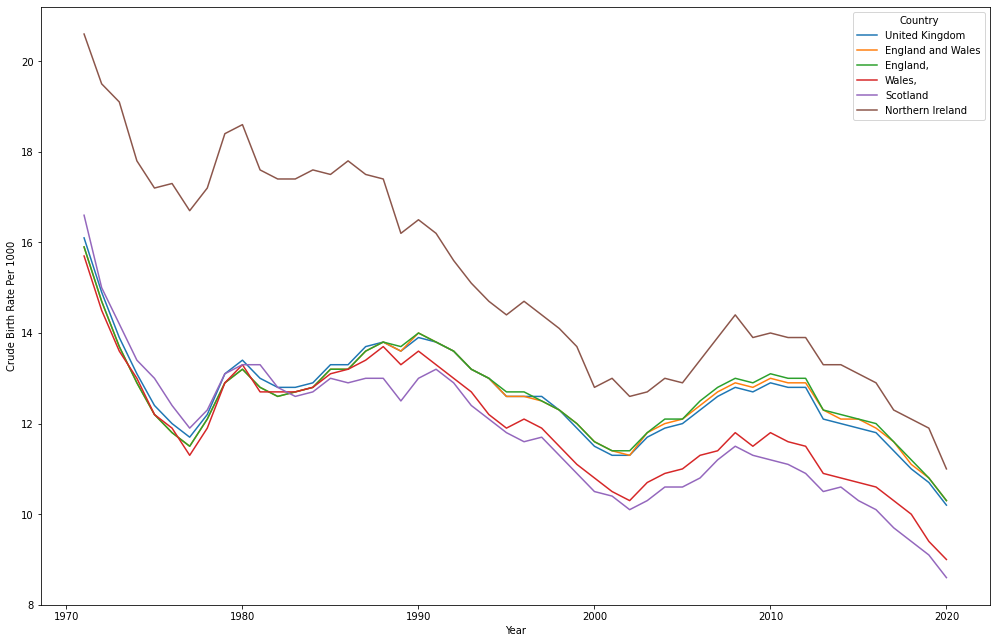

In [7]:
%matplotlib inline
plt.figure(figsize=(17, 11))
sns.lineplot(data=df_Birth_m,x="Year",y="Crude Birth Rate Per 1000", hue='Country')



## Birth Rate as avg is on decline in whole of UK, Allthough in 1970 N. Ireland had higer birth rate. now all Nation in UK  are Decelining and converging.

## Many  reason can be stated such as : 
*With gender equlity Women are pusing higer education and role in society are chaing, hence leading to delayed parent hood \
*Medical advancements and federal regulators’ approval of the birth control pill 

C:\Users\LordXavier\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,United_Kingdom_BirthRate,United_Kingdom_Mother_Age
United_Kingdom_BirthRate,1.000000,-0.612177
United_Kingdom_Mother_Age,-0.612177,1.000000


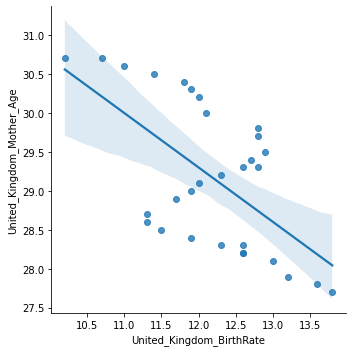

In [8]:
df_UK_Mother = pd.read_csv('Datasets/UK_Mother_Age.csv')
for column in df_UK_Mother.columns:
    df_UK_Mother[column] = df_UK_Mother[column].astype(float)
    df_UK_Mother.rename({column: re.sub('\d', '', column)}, axis=1,inplace=True)

df_UK_Mother["Year"] = pd.to_datetime(df_UK_Mother["Year"], format="%Y")

df1=df_Birth[['Year','United Kingdom']]
df1.rename({'United Kingdom':'United_Kingdom_BirthRate'}, axis=1,inplace=True)
df2=df_UK_Mother[['Year','United Kingdom']]
df2.rename({'United Kingdom':'United_Kingdom_Mother_Age'}, axis=1,inplace=True)
new_df= pd.merge(df1, df2, how='left', on='Year')
#df_concate = pd.merve(df_Birth[['Year','United Kingdom']], df_UK_Mother[['Year','United Kingdom']])
new_df.dropna(axis=0, inplace=True)

sns.lmplot(data=new_df, x="United_Kingdom_BirthRate", y="United_Kingdom_Mother_Age")

new_df.corr()

# Relation between Birth rate and Mother Age for UK -0.61 Pearson coeffecint relation along wilh and clearly visible slope of Regresion line of Morther Age and birthrate relation. To establish relation between Mean Mother Age and Birthrate

In [9]:
#Datarame was unpivoted, So to easly vilulize data with Seaborn melt funtion Unpivots the DF
df_Death_m = df_Death.melt('Year', var_name='Country', value_name='Crude Death Rate Per 1000')

<AxesSubplot:xlabel='Year', ylabel='Crude Death Rate Per 1000'>

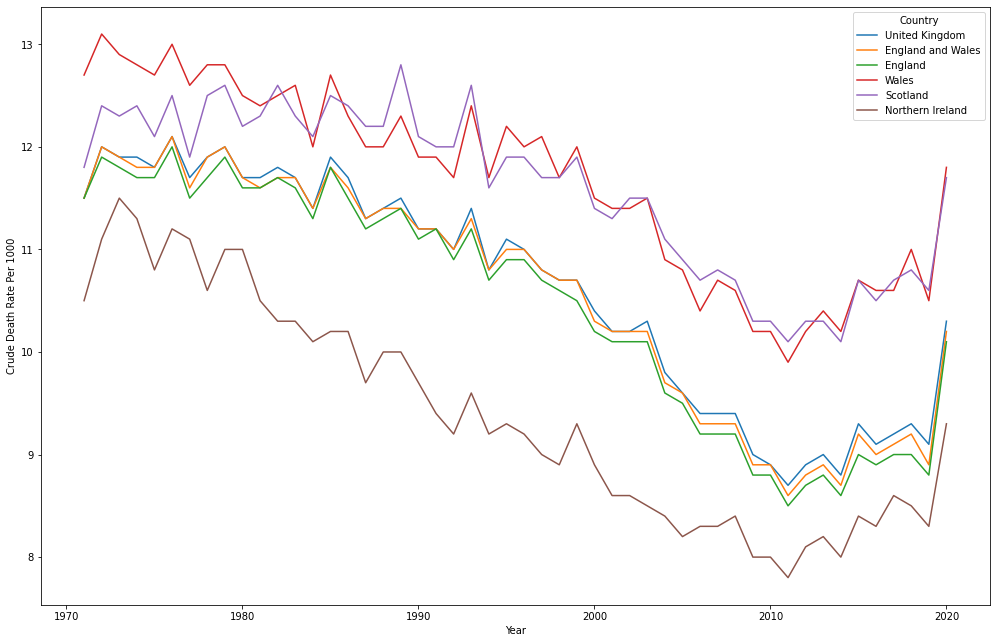

In [10]:
%matplotlib inline
plt.figure(figsize=(17, 11))
sns.lineplot(data=df_Death_m,x="Year",y="Crude Death Rate Per 1000", hue='Country')



# Death Rate of UK's Nation's is in constant decline, however one can see spike in Deathrate in 2020 due to Covid-19

In [11]:

df_death_brith=pd.merge(df_Birth[['Year','United Kingdom']], df_Death[['Year','United Kingdom']], how='left', on='Year')
df_death_brith.rename({'United Kingdom_x':'United_Kingdom_Birth_rate','United Kingdom_y':'United_Kingdom_Death_rate'}, axis=1,inplace=True)


<AxesSubplot:xlabel='Year', ylabel='Rate Per 1000'>

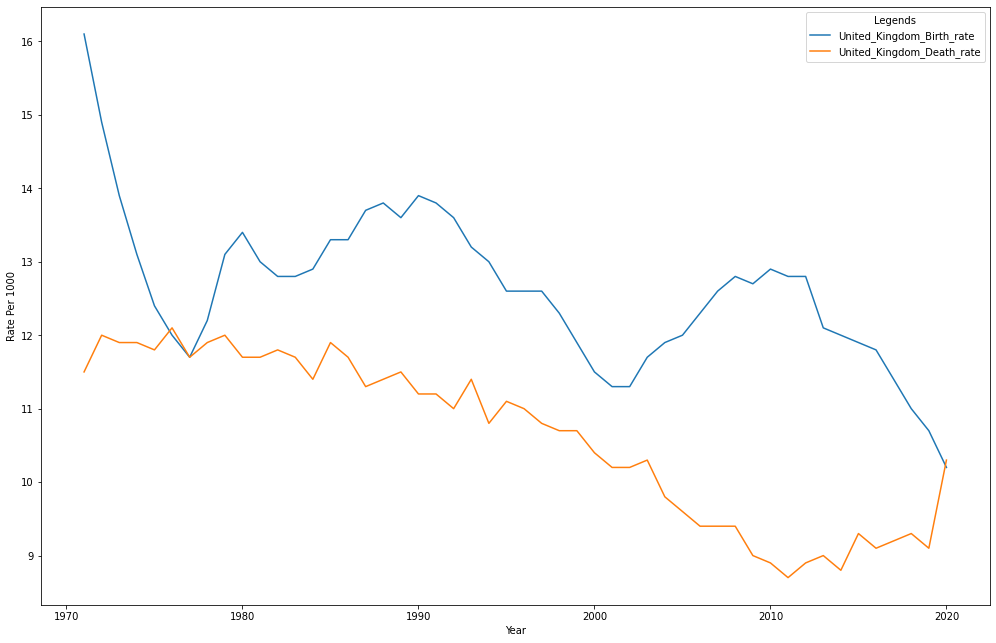

In [12]:

#Datarame was unpivoted, So to easly vilulize data with Seaborn melt funtion Unpivots the DF
df_death_brith_m = df_death_brith.melt('Year', var_name='Legends', value_name='Rate Per 1000')
%matplotlib inline
plt.figure(figsize=(17, 11))
sns.lineplot(data=df_death_brith_m,x="Year",y="Rate Per 1000", hue='Legends')

## Birth Rate and Death Rate per 1000 through the years for whole of UK

In [14]:


df_Int_Birth['All_country_mean'] = df_Int_Birth[df_Int_Birth.columns.drop('Year')].mean(axis=1)
df_Int_Birth=df_Int_Birth[['Year','United Kingdom','All_country_mean']]

<AxesSubplot:xlabel='Year', ylabel='Birth Rate Per 1000'>

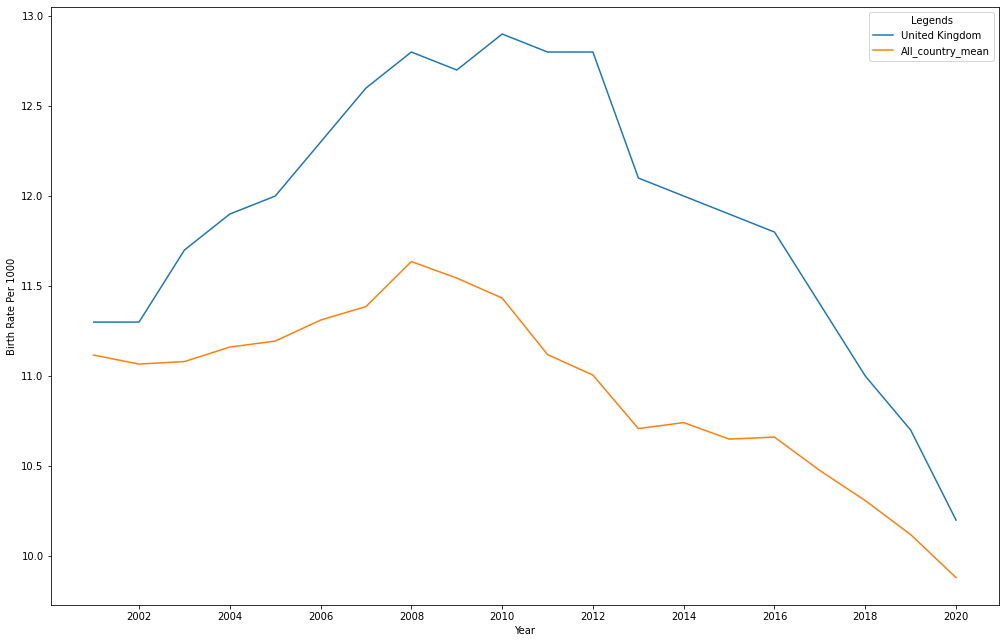

In [15]:

#Datarame was unpivoted, So to easly vilulize data with Seaborn melt funtion Unpivots the DF
df_Int_Birth_m = df_Int_Birth.melt('Year', var_name='Legends', value_name='Birth Rate Per 1000')
%matplotlib inline
plt.figure(figsize=(17, 11))
sns.lineplot(data=df_Int_Birth_m,x="Year",y="Birth Rate Per 1000", hue='Legends')

## All Countries include:
'Austria', 'Belgium', 'Bulgaria', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       '  Germany', 'Greece', 'Hungary', 'Irish Republic', 'Italy', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal',
       'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'EU', 'Australia',
       'Canada', 'New Zealand', 'China', 'India', 'Japan', 'USA'

       